<a href="https://colab.research.google.com/github/RohanOpenSource/ml-notebooks/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import matplotlib as mpl
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X.shape, y.shape

((70000, 784), (70000,))

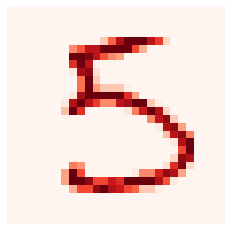

In [4]:
digit = X[60015]
image = digit.reshape(28, 28)

mpl.pyplot.imshow(image, cmap="Reds") #red is a nice color
mpl.pyplot.axis("off")
mpl.pyplot.show()

In [5]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

Let's start with binary classification. We will classify whether the digit as 5 or not 5.

In [7]:
from sklearn.linear_model import SGDClassifier

model_1 = SGDClassifier(random_state=42)
model_1.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [8]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(model_1, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

This model has about 90% accuracy meaning that it is just guessing no and 90% of the times it is right because 10% of the data is a 5. Let's try something else.

In [9]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_2.fit(X_train, y_train_5, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.1484 - accuracy: 0.9771
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0353 - accuracy: 0.9896
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0293 - accuracy: 0.9910
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0211 - accuracy: 0.9936
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0127 - accuracy: 0.9960
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0129 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0079 - accuracy: 0.9977
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.009

In [10]:
X_train[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
model_2.predict(digit.reshape(1, 784))

array([[0.9832327]], dtype=float32)

In [16]:
model_2.evaluate(X_test, y_test_5)

313/313 [==============================] - 1s 2ms/step - loss: 0.0334 - accuracy: 0.9923


[0.03335580602288246, 0.9922999739646912]

Now let's try multiclass classification!

In [20]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])
model_3.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6396 - accuracy: 0.8886
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1820 - accuracy: 0.9480
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1494 - accuracy: 0.9574
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1236 - accuracy: 0.9655
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1054 - accuracy: 0.9703
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0956 - accuracy: 0.9742
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9767
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0740 - accuracy: 0.9804
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0682 - accuracy: 0.9816
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.062

In [24]:
pred = model_3.predict(digit.reshape(1, 784))
np.argmax(pred)

5

In [25]:
model_3.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1145 - accuracy: 0.9753


[0.11446508765220642, 0.9753000140190125]

In [30]:
model_3.save("mnist.h5")

This accuracy is ok, and is good enough for the application I plan to use this in. A convolutional neural network might do a bit better, however I do not know much about convolutional neural networks at the moment. Once I learn more about them, I will update this notebook